In [1]:
import pandas as pd                                                 # used for data manipulation and analysis
import numpy as np                                                  # plotting framework
import matplotlib.pyplot as plt                                      # statisticall graph framework
import seaborn as sns                                                 # statisticall graph framework
from scipy import stats


from sklearn.model_selection import GroupShuffleSplit                #generate train_test_split basedon groups

from sklearn.preprocessing import MinMaxScaler         # for normalizing data
from sklearn.preprocessing import StandardScaler       # import scaler for feature scaling

from sklearn.impute import SimpleImputer              # handling missing valus with simple imputation
from sklearn.ensemble import IsolationForest          # for dimensionality reduction



from sklearn import preprocessing
from sklearn.decomposition import PCA                                 # useful for dimensionality reduction
from sklearn.ensemble import RandomForestClassifier                   # ensemble learning method based on bagging decision trees
from sklearn.linear_model import LogisticRegression                   # useful for binary classification
from sklearn.svm import SVC                                            ## Support Vector Machine classifier
!pip install xgboost
import xgboost as xgb
from sklearn.decomposition import NMF, PCA



from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler # adjust the scale of features for improve accuracy

# !pip install icecream
# from icecream import ic

!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE                          # oversamplig the minority class
from imblearn.under_sampling import RandomUnderSampler            # for undersamplingthe majority class




from sklearn.metrics import balanced_accuracy_score, f1_score                   # metrics for evaluating the performance of models
from sklearn.metrics import classification_report                               # provides a comprehensive summary of precision, recall, and F1 score


# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline                                # sequentially applies a list of transforms and a final estimator
from sklearn.base import BaseEstimator                                # Base class for all estimators in scikit-learn
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV , StratifiedKFold  # exhaustive search over specified parameter values for an estimator, 
                                                                     # useful in tuning hyperparameters to optimize model performance 
from sklearn.base import BaseEstimator, TransformerMixin             # base class for all estimators





# a. Exploratory Data Analysis



In [2]:
def explore_data():                                  #Get the dataset 
    
    """
    this function aims to calculate shape of dataset along with 
    number of variables (features) and number of observations
    
    """
    df = pd.read_csv('df_reduced.csv', sep = ';')
    shape_of_dataset = df.shape                      # Get the shape of the dataset
    number_of_variables= df.shape[1]                 # Get the number of variables
    number_of_observations = df.shape[0]             # Get the number of observations
    print('shape of dataset is : {}'.format(shape_of_dataset))
    print('number of variables are : {}'.format(number_of_variables))
    print('number of observations are : {}'.format(number_of_observations))
    print('dataset has {} features and {} observations'.format(number_of_variables, number_of_observations))
    return df
    

### check the data types

In [3]:
def check_data_types(df):
    """
    check the types of variables in dataset
    """
    data_types = df.dtypes                                            # get the data types
    features_value_counts = df.dtypes.value_counts()                   # This will give you a summary of value counts of the data types
    print(f'data_types:\n\n{data_types}')
    
    print('feature_value counts:\n{}'.format(features_value_counts))
        

### make a numeric dataset

In [4]:
## drop useless columns which are only discriptive or informational columns, except Info_cluster column 

def numeric_dataset(df):  #make numerical dataset
    
    col_to_drop = [col for col in df.columns if col.startswith('Info_') and col != 'Info_cluster'] #list of column we want to drop(except info_cluster) because are useless
    df_numeric = df.drop(col_to_drop, axis = 1)                                                     # drop useless columns to have numeric dataset
    return df_numeric


### MiniMax Ranges with Histogram

In [5]:
def minimax_hist(df):
    max_values = df.max()  #calculate maximum values for each variable in dataset
    min_values = df.min()  #calculate minimum values for each variable in dataset
    
    ranges = max_values - min_values # Calculating the range (max - min) for each variable
    print('ranges:{}'.format(ranges))
    
    # Plotting the histogram of variable ranges
    plt.figure(figsize=(8, 5))
    plt.hist(ranges, bins=5, alpha=0.80, color='skyblue', edgecolor='black')
    plt.xlabel('Range (Max - Min) of Variables')
    plt.ylabel('Count')
    plt.title('Histogram of Variable Ranges')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Investigating missing values

In [6]:
def count_plot_missing_values(df):
    
    #plot the distribution of missing values with heatmap
    missing_values_per_column = df.isnull().sum(axis = 0) #total number of missing values (NaN values) for each column in the DataFrame
    missing_values_per_row = df.isnull().sum(axis = 1)    # total number of missing values for each row of dataframe
    
    print('missing_values in in entire dataset per column :\n\n{}\n'.format(missing_values_per_column))
    print('missing_values in in entire dataset per row :\n\n{}'.format(missing_values_per_row))

    
    plt.figure(figsize = (10, 5))                           #visually identify patterns of missing values in dataset
    sns.heatmap(df.isnull(), cbar = True, cmap = 'viridis')
    plt.title('Heatmap of missing values in the dataset')
    plt.xlabel('Features')
    plt.ylabel('Index')
    plt.show
        


## Handling missing values by dropping them
    

In [7]:
def clean_up_missing_values(df):
    print('####################################### check missing values on the columns ################################################')
    
    #Investigating missing values per columns
    missing_values_per_column = df.isnull().sum(axis = 0)
    print('missing_values in in entire dataset per column:\n\n{}\n'.format(missing_values_per_column))
    columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]  # columns with missing values
    print('columns with missing values:\n\n{}\n'.format(columns_with_missing_values))
    print('maximum counts of missing values per column :{}'.format(columns_with_missing_values.max())) # get the maximum counts of missingness on column
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    formated_missing_percentage = missing_percentage.apply(lambda x: '{:.2f}%'.format(x)) #Get te percentage of missingvalues per column
    print('formated_missing_percentage:\n\n{}\n'.format(formated_missing_percentage))
    # Finding columns with maximum counts of missing values
    column_with_max_missing_values = formated_missing_percentage.idxmax()                # get the index of maximum counts of missingness on column
    # print(column_with_max_missing_values)
    max_missing_value = formated_missing_percentage.max()    # get the percentage of maximum amount of missing values on column
    print('column name with maximum missing value is {} with counts of {} which is {} of missing values\n'
          .format(column_with_max_missing_values, columns_with_missing_values.max(), max_missing_value))
    
    #removing column with the most missing values ---> feat_esm1b_148
    to_drop_column = column_with_max_missing_values
    # obtaining df_clean_1 after dropping the column with most missing values(feat_esm1b_148)
    df_clean_1 = df.drop(to_drop_column, axis = 1)   #drop the column feat_esm1b_148 which is not informative
    missing_values_except_feat_esm1b_148 = missing_values_per_column.sum() - columns_with_missing_values.max()
    print('total missing values left after dropping feat_esm1b_148 are:{}\n'.format(missing_values_except_feat_esm1b_148))
    print('#################################### check missing values on the rows ##############################################################')
    #Investigating missing values per row
    missing_values_per_row = df_clean_1.isnull().sum(axis = 1)
    print(missing_values_per_row)
    rows_with_missing_values = missing_values_per_row[missing_values_per_row > 0]      # return rows_with_missing_values
    print('rows with missing values:\n\n{}\n'.format(rows_with_missing_values))
    unique_missing_value_per_rows = rows_with_missing_values.unique().tolist()
    print('unique counts of missing values in rows of dataset:\n{}\n'.format(unique_missing_value_per_rows)) #unique counts of missing values across all rows
    number_of_rows_with_unique_counts_of_missing_values = rows_with_missing_values.value_counts()
    print('number of rows for each unique counts of missing values:\n{}\n'.format(number_of_rows_with_unique_counts_of_missing_values))
    indices_of_rows_with_missing_values = df_clean_1.loc[missing_values_per_row > 0]  # get indices of rows with missing values to drop later
    # print(indices_of_rows_with_missing_values)
    df_clean_2 = df_clean_1.drop(indices_of_rows_with_missing_values.index, axis = 0)
    print('shape of new dataset after treating missing values : {}'.format(df_clean_2.shape))
    
    print('############################## check not having missing values in entire rows and columns #########################################')
    print(df_clean_2.isnull().sum())  # check to see if there is still any column to have missing values
    print(df_clean_2.isnull().sum(axis = 1))  # check to see if still there is any rows with missing values
    return df_clean_2
 

    

## handling missing values by mean imputation

In [8]:
def handling_missing_values_with_mean_imputation(df):
    
    missing_values= count_missing_values(df)
    # ic(missing_values)
    to_drop_column = [missing_values.idxmax()]
    
    # obtaining new df after handling the column with most missing values
    df_clean_1 = df.drop(to_drop_column, axis = 1)
    
    
    
    
    # Create a SimpleImputer object with strategy of filling missing values with the 'mean' of the column
    imputer = SimpleImputer(strategy='mean')
    
    # Fit the imputer on your data and transform the data
    imputed_data = imputer.fit_transform(df_clean_1)
    # ic(type(imputed_data))
    
    # The output of SimpleImputer is a plain numpy array. Convert it back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=df_clean_1.columns)
    # ic(type(imputed_df))
    
    return imputed_df

## splitting dataset into train and test with respect to info cluster variable

In [9]:
# GroupShuffleSplit ensures that all observations within the same Info_cluster group are kept together and only appear in either 
# the training or the testing set, not both to ensure that an entire cluster only appears in the training or testing set
                                                                                                 

def split_data(df):
    

    groups = df['Info_cluster']                                                          # Get the info cluster
    
    
    gss = GroupShuffleSplit(n_splits=2, test_size= 0.2, random_state= 123)                        #initialise the splitter
    
    for train_idx, test_idx in (gss.split(df, groups = df['Info_cluster'])):     # Split the data while keeping Info_cluster groups together
        df_train = df.iloc[train_idx]                                                    # train set holds training data from dataset
        df_test = df.iloc[test_idx]                                                      # test set holds testing data  from dataset
        unique_train_info_clusters = set(df_train['Info_cluster'].unique()) #retrieves all unique values from the 'Info_cluster' column of the train set
        print('unique_train_info_clusters : \n\n{}\n'.format(unique_train_info_clusters))
        unique_test_info_clusters = set(df_test['Info_cluster'].unique()) #etrieves all unique values from the 'Info_cluster' column of the test set
        print('unique_test_info_clusters : \n\n{}\n'.format(unique_test_info_clusters))
        

    # A test to make sure that two info_clusters are not overlapping and ther is no intersection betwen them
    print('intersection of train and test split: {}\n'.format(unique_train_info_clusters.intersection(unique_test_info_clusters)))
    print('shape of train set:{}'.format(df_train.shape))
    print('shape of test set:{}'.format(df_test.shape))

    
    return df_train, df_test                                                                     


## Explore and Handling Outliers by Removing

In [10]:

def handle_outliers_remove(X_train, y_train):
  
    iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(X_train)
    
    outlier_counts = pd.Series(outliers).value_counts()  # convert list of outliers values to series of outliers values so that we can use value_counts
    number_of_outliers = outlier_counts[-1] if -1 in outlier_counts else 0
    number_of_inliers = outlier_counts[1] if 1 in outlier_counts else 0
    
    print("Number of Outliers:", number_of_outliers)
    print("Number of Inliers:", number_of_inliers)
        
    total_data_points = len(X_train)
    outlier_percentage = (number_of_outliers / total_data_points) * 100
    
    print("Outlier Percentage:", outlier_percentage)

#  Visualization with QQ Plot before removing outliers
    
    plt.figure(figsize=(7, 4))
    for column in X_train.columns:
        # Get sorted values of the feature
        sorted_values = np.sort(X_train.columns)
          # Generate theoretical quantiles from a normal distribution
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_values)))
        # Plot the QQ plot
    plt.scatter(theoretical_quantiles, sorted_values, alpha=0.5)
    plt.title('QQ Plot for Each Feature ( Data with Outliers)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Values')
    plt.grid(False)
    plt.show()

    
   
     #  Visualization with QQ Plot  after removing outliers
    
    X_train['outlier'] = outliers

    X_train_with_no_outliers = X_train[X_train['outlier'] == 1]
    X_train_with_no_outliers_index = X_train_with_no_outliers.index

    y_train_cleaned = y_train.loc[X_train_with_no_outliers_index]

    X_train_cleaned = X_train_with_no_outliers.drop(columns=['outlier'])
    print('shape of X_train after removing outliers:{}'.format(X_train_cleaned.shape))
    print('shape of y_train after removing outliers:{}'.format(y_train_cleaned.shape))

    
    
    # Generate QQ plot for each feature
    plt.figure(figsize=(7, 4))
    for column in X_train_cleaned.columns:
        # Get sorted values of the feature
        sorted_values = np.sort(X_train_cleaned[column])
        # Generate theoretical quantiles from a normal distribution
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_values)))
        # Plot the QQ plot
    plt.scatter(theoretical_quantiles, sorted_values, alpha=0.5)
    plt.title('QQ Plot for Each Feature (Cleaned Data - No Outliers)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(False)
    plt.show()
    
    return X_train_cleaned, y_train_cleaned

    

## Explore class imbalancing with graphs

In [11]:
# this function shows class imbalancing interms of Info_cluster column

def explore_class_imbalance_info_cluster(df):
    
    class_balance_per_column = df.groupby('Info_cluster')['Class'].value_counts().unstack()  #finding class counts based on info cluster on the class column
    class_counts = df['Class'].value_counts()
    
    class_balance_per_column .plot(kind='bar', stacked=True)
    plt.title('Class Balance per Info_cluster')
    plt.xlabel('Info_cluster')
    plt.ylabel('Frequency')
    overall_class_balance = df['Class'].value_counts()

    plt.show()


In [12]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

def explore_class_imbalance(X_train, y_train):
    counter = Counter(y_train)
    print(counter)
    # scatter plot of examples by class label
    for label, _ in counter.items():
        
        row_ix = where(y_train == label)[0]
        plt.scatter(X_train.iloc[row_ix, 0], X_train.iloc[row_ix, 1], label=str(label))
    plt.legend()
    plt.show()
 ########################################################## Another graph for imbalncing #####################################################   
    class_counts = y_train.value_counts()
    print('class value counts:\n{}\n'.format(class_counts))
    class_positive_counts = class_counts[1]
    class_negative_counts = class_counts[0]
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))

    class_counts.plot(kind = 'bar', rot = 0, color = ['skyblue', 'red'])
    plt.xlabel('Class Values')
    plt.ylabel('Number of Instances')
    plt.title('Imbalanced Class Distribution')
    plt.show()
    


## Normalisation

In [13]:
#Normalizing the train set and test set

class Normalize(BaseEstimator):
    def __init__(self, scaler=MinMaxScaler()):
        self.scaler = scaler
    
    def fit(self, X_train, y_train):
        
        # # Save the column you want to exclude
        train_excluded = X_train[['Info_cluster']].copy()
        # # Drop the column you want to exclude from scaling
        train_df = X_train.drop(columns=['Info_cluster'])
    
        self.scaler.fit(train_df)
    
        
        return self
        
        
    def transform(self, X):
        
        excluded = X[['Info_cluster']].copy()
        df = X.drop(columns=['Info_cluster'])
        X_scaled = pd.DataFrame(self.scaler.transform(df), columns=df.columns, index=df.index)
        # Add the excluded column back to both dataframes
        X_scaled[['Info_cluster']] = excluded
        
        return X_scaled

# Feature Selection with Correlation and PCA

In [27]:
class FeatureSelection(BaseEstimator):
    
    def __init__(self, method='Correlation', self_corr_threshold=0.3, label_corr_threshold=0.01, n_components=5):
        
        self.method = method    
        self.self_corr_threshold = self_corr_threshold
        self.label_corr_threshold = label_corr_threshold
        self.n_components = n_components

    def fit(self, X_train, y_train):
       
        print('Method:', self.method)
        # Save the column you want to exclude
        train_excluded = X_train[['Info_cluster']].copy()
        # Drop the column you want to exclude from scaling
        train_df = X_train.drop(columns=['Info_cluster'])

        if self.method == 'Correlation':
            corr = train_df.corr()
            # corr = pd.DataFrame(corr)
            # print('correlation matrix:\n{}'.format(corr))
            # corr = corr.to_numpy()
            
            
            # Select the upper triangle of the correlation matrix
            upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
            
            
           # Find the features with high correlation
            self.to_drop = [column for column in upper.columns \
                       if any(upper[column] > self.self_corr_threshold) \
                       or any(upper[column] < -self.self_corr_threshold)]
    
            df_uncorrelated = train_df.drop(self.to_drop, axis=1)
            
            correlation_with_labels = pd.DataFrame(df_uncorrelated.corrwith(pd.Series(y_train.squeeze()))).T   # finding correlations between features with column class


            # ic(correlation_with_labels.min(axis=1), correlation_with_labels.max(axis=1))
            self.to_keep = [column for column in correlation_with_labels.columns \
                       if correlation_with_labels[column].values[0] > self.label_corr_threshold \
                       or correlation_with_labels[column].values[0] < -self.label_corr_threshold]
            # print(self.to_keep)
            
        
        elif self.method == 'PCA':
            self.pca = PCA(n_components=self.n_components)               
            self.pca.fit(train_df)

        return self


    def transform(self, X):
        

        excluded = X[['Info_cluster']].copy()
        df = X.drop(columns=['Info_cluster'])

        if self.method == 'Correlation':
            
            # Drop the features with high correlation with themselves
            df_uncorrelated = df.drop(self.to_drop, axis=1)
            
            # to keep the features with high correlation with labels
            df_final_features = df_uncorrelated[self.to_keep]
            print('Best features from correlation\n:{}\n\n'.format(df_final_features))
            
        
        elif self.method == 'PCA':
            features_reduced = self.pca.transform(df)
            df_final_features = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(features_reduced.shape[1])])
            print('Best features from pca\n:{}n\n'.format(df_final_features))

        df_final_features.loc[:, 'Info_cluster']= excluded.values
        return df_final_features


# Building Models

In [28]:
# this class define 4 different classifiers for classification and predictions 

class Classifiers(BaseEstimator):
    def __init__(self, classifier_type = 'RandomForest', learning_rate = 0.1):
        
        
        self.classifier_type = classifier_type
        self.learning_rate = learning_rate
        
    def fit(self, X_train, y_train):
        
        # Drop the column you want to exclude from scaling
        train_df = X_train.drop(columns=['Info_cluster'])

        #initialize classifiers
        if self.classifier_type == 'RandomForest':
            self.classifier = RandomForestClassifier(random_state=42)
        elif self.classifier_type == 'LogisticRegression':
            self.classifier = LogisticRegression()
        elif self.classifier_type == 'XGBoost':
            self.classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
        elif self.classifier_type == 'SVM':
            self.classifier = SVC(kernel='linear', random_state=42)

       
        self.classifier.fit(train_df, y_train)   # fit classifiers on x_train and y_train

        return self

    def transform(self, X):
        
        return X
    
    def score(self, X_test, y_test):
       
        
        test_df = X_test.drop(columns=['Info_cluster'])

        print('classification report for test set:')
   
        # Make predictions and evaluate the model
        predictions = self.classifier.predict(test_df)
        
        balanced_accuracy = balanced_accuracy_score(y_test, predictions)
        print('balanced_accuracy: {}\n'.format(balanced_accuracy))
        print('classification_report:\n{}\n'.format(classification_report(y_test, predictions)))
        
        return balanced_accuracy

    def predict(self, X_test):
       
        
        test_df = X_test.drop(columns=['Info_cluster'])
   
        # Make predictions and evaluate the model
        predictions = self.classifier.predict(test_df)    # make rediction with classifiers
        return predictions
    

## RUN 

shape of dataset is : (12402, 300)
number of variables are : 300
number of observations are : 12402
dataset has 300 features and 12402 observations
data_types:

Info_PepID           object
Info_organism_id      int64
Info_protein_id      object
Info_pos              int64
Info_AA              object
                     ...   
feat_esm1b_285      float64
feat_esm1b_286      float64
feat_esm1b_287      float64
feat_esm1b_288      float64
feat_esm1b_289      float64
Length: 300, dtype: object
feature_value counts:
float64    290
object       6
int64        4
Name: count, dtype: int64
ranges:Info_cluster      276.000000
Class               2.000000
feat_esm1b_0        1.664613
feat_esm1b_1        1.868110
feat_esm1b_2        1.892323
                     ...    
feat_esm1b_285      2.101608
feat_esm1b_286      1.942002
feat_esm1b_287      1.691158
feat_esm1b_288      1.782276
feat_esm1b_289      2.052069
Length: 292, dtype: float64


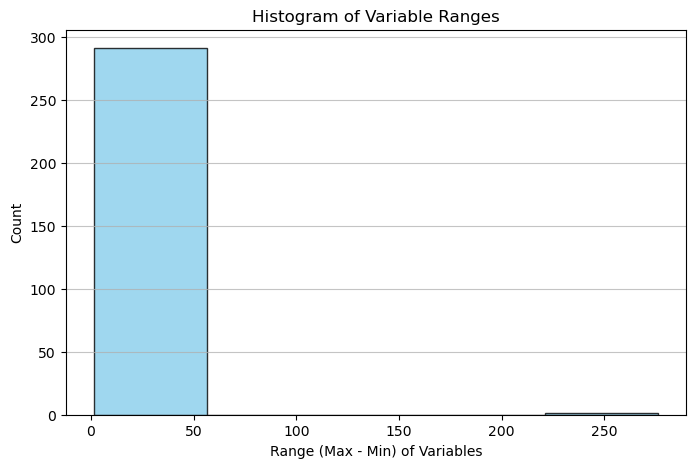

missing_values in in entire dataset per column :

Info_cluster       0
Class              0
feat_esm1b_0      14
feat_esm1b_1      14
feat_esm1b_2      12
                  ..
feat_esm1b_285    13
feat_esm1b_286    14
feat_esm1b_287    11
feat_esm1b_288    13
feat_esm1b_289    14
Length: 292, dtype: int64

missing_values in in entire dataset per row :

0        1
1        1
2        1
3        1
4        1
        ..
12397    1
12398    1
12399    0
12400    1
12401    1
Length: 12402, dtype: int64
####################################### check missing values on the columns ################################################
missing_values in in entire dataset per column:

Info_cluster       0
Class              0
feat_esm1b_0      14
feat_esm1b_1      14
feat_esm1b_2      12
                  ..
feat_esm1b_285    13
feat_esm1b_286    14
feat_esm1b_287    11
feat_esm1b_288    13
feat_esm1b_289    14
Length: 292, dtype: int64

columns with missing values:

feat_esm1b_0      14
feat_esm1b_1 

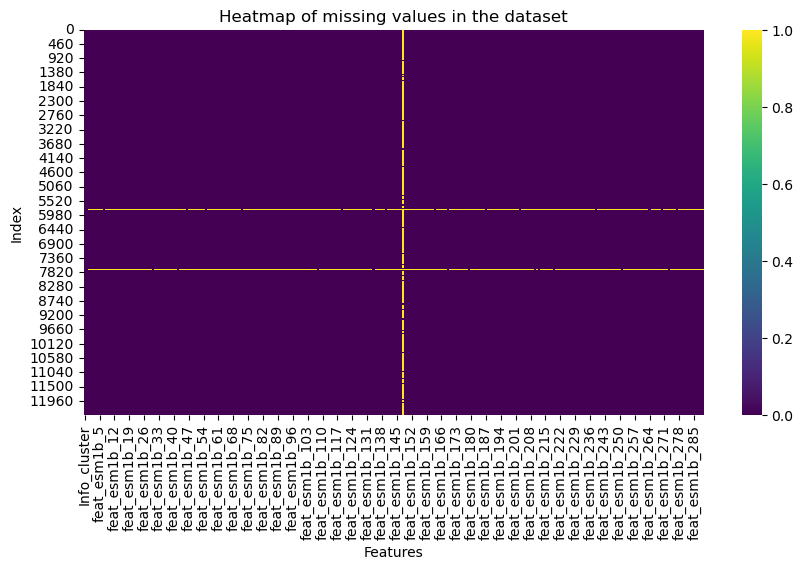

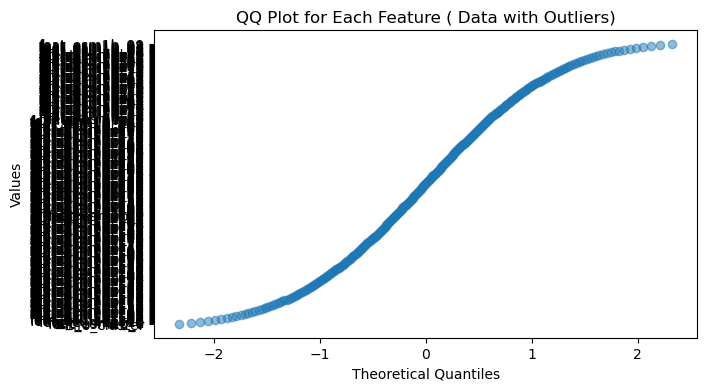

shape of X_train after removing outliers:(9479, 290)
shape of y_train after removing outliers:(9479,)


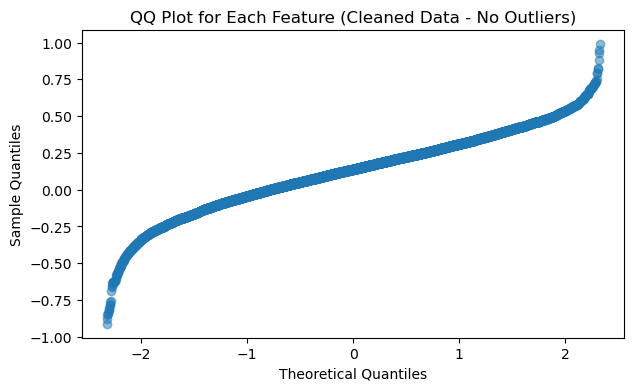

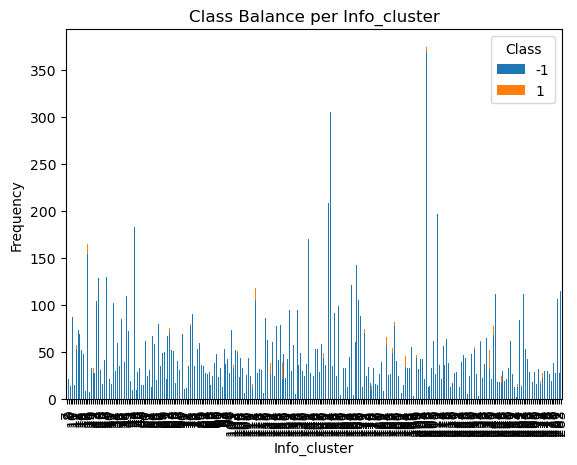

Counter({0.0: 9351, 1.0: 128})


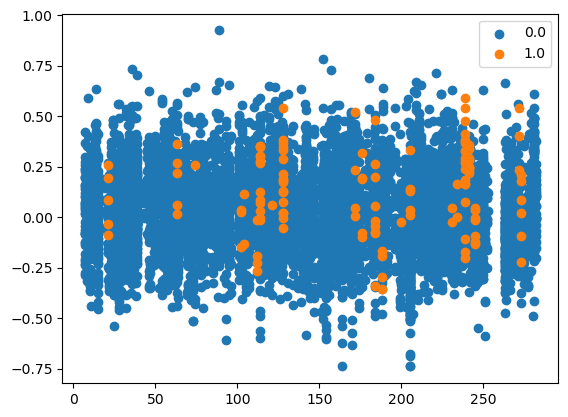

class value counts:
Class
0.0    9351
1.0     128
Name: count, dtype: int64



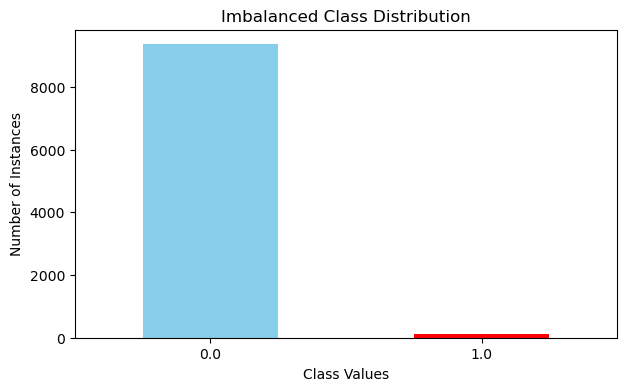

Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.252634  0.138869  0.169787  0.005543
1     0.385840 -0.132099  0.045133 -0.023690
2    -0.141257  0.256290 -0.244332  0.027908
3     0.109315  0.277938  0.285575  0.185163
4    -0.073247 -0.013243  0.369436  0.147484
...        ...       ...       ...       ...
4734 -0.202832  0.199962 -0.044453 -0.009398
4735  0.516846  0.026437  0.187739 -0.157641
4736 -0.148554 -0.199074 -0.012152  0.333381
4737 -0.225769 -0.062628 -0.061580  0.143548
4738  0.165384 -0.177747 -0.172101  0.055909

[4739 rows x 4 columns]n

Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.109042 -0.013301 -0.114283 -0.008588
1    -0.132496  0.070864 -0.232747  0.106121
2     0.395785 -0.051042  0.214850  0.167062
3    -0.350038 -0.008957 -0.171795 -0.094200
4     0.059160  0.288646  0.211643  0.172245
...        ...       ...       ...       ...
4735 -0.369893 -0.243758  0.005217 -0.140427
4736 -0.20930

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  \
0        -0.013987      0.097248      0.022484     -0.012985     -0.087696   
1         0.040362     -0.040289     -0.073881     -0.058264     -0.012313   
2         0.022838      0.019109      0.001365     -0.023907     -0.038498   
3         0.053362      0.087647      0.055030      0.041717     -0.065849   
4         0.064652     -0.011770     -0.004438     -0.000370     -0.042518   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.039639      0.122340     -0.045603     -0.004401   
6191     -0.071567      0.043625      0.043414      0.052755     -0.076439   
6192     -0.042972      0.052149     -0.005163      0.027174     -0.015091   
6193     -0.012467      0.136763      0.035878     -0.047301      0.027894   
6194     -0.043301      0.031223      0.015600      0.019011     -0.077644   

      feat_esm1b_8  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
6195      -0.032464      0.049378      0.070509      0.014308      0.031436   
6196      -0.003860      0.033416     -0.002364     -0.015127      0.036023   
6197       0.014240     -0.009515     -0.007015     -0.029610      0.011770   
6200       0.039918      0.067385     -0.012914     -0.076149      0.006659   
6201      -0.006527      0.100876     -0.060292     -0.066020     -0.099266   
...             ...           ...           ...           ...           ...   
12397      0.056295      0.073580      0.046062     -0.050953     -0.041830   
12398      0.001664      0.005409      0.018823     -0.102430     -0.036132   
12399     -0.018021      0.020194     -0.046644     -0.045993      0.027412   
12400      0.061834      0.021448     -0.053846     -0.012010     -0.016312   
12401     -0.048575      0.019541      0.083812     -0.111318      0.043957   

       feat_esm1b_7

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  \
0        -0.013987      0.097248      0.022484     -0.012985     -0.087696   
1         0.040362     -0.040289     -0.073881     -0.058264     -0.012313   
2         0.022838      0.019109      0.001365     -0.023907     -0.038498   
3         0.053362      0.087647      0.055030      0.041717     -0.065849   
4         0.064652     -0.011770     -0.004438     -0.000370     -0.042518   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.039639      0.122340     -0.045603     -0.004401   
6191     -0.071567      0.043625      0.043414      0.052755     -0.076439   
6192     -0.042972      0.052149     -0.005163      0.027174     -0.015091   
6193     -0.012467      0.136763      0.035878     -0.047301      0.027894   
6194     -0.043301      0.031223      0.015600      0.019011     -0.077644   

      feat_esm1b_8  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
6195      -0.032464      0.049378      0.070509      0.014308      0.031436   
6196      -0.003860      0.033416     -0.002364     -0.015127      0.036023   
6197       0.014240     -0.009515     -0.007015     -0.029610      0.011770   
6200       0.039918      0.067385     -0.012914     -0.076149      0.006659   
6201      -0.006527      0.100876     -0.060292     -0.066020     -0.099266   
...             ...           ...           ...           ...           ...   
12397      0.056295      0.073580      0.046062     -0.050953     -0.041830   
12398      0.001664      0.005409      0.018823     -0.102430     -0.036132   
12399     -0.018021      0.020194     -0.046644     -0.045993      0.027412   
12400      0.061834      0.021448     -0.053846     -0.012010     -0.016312   
12401     -0.048575      0.019541      0.083812     -0.111318      0.043957   

       feat_esm1b_7

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  \
0        -0.013987      0.097248      0.022484     -0.012985     -0.087696   
1         0.040362     -0.040289     -0.073881     -0.058264     -0.012313   
2         0.022838      0.019109      0.001365     -0.023907     -0.038498   
3         0.053362      0.087647      0.055030      0.041717     -0.065849   
4         0.064652     -0.011770     -0.004438     -0.000370     -0.042518   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.039639      0.122340     -0.045603     -0.004401   
6191     -0.071567      0.043625      0.043414      0.052755     -0.076439   
6192     -0.042972      0.052149     -0.005163      0.027174     -0.015091   
6193     -0.012467      0.136763      0.035878     -0.047301      0.027894   
6194     -0.043301      0.031223      0.015600      0.019011     -0.077644   

      feat_esm1b_8  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
6195      -0.032464      0.049378      0.070509      0.014308      0.031436   
6196      -0.003860      0.033416     -0.002364     -0.015127      0.036023   
6197       0.014240     -0.009515     -0.007015     -0.029610      0.011770   
6200       0.039918      0.067385     -0.012914     -0.076149      0.006659   
6201      -0.006527      0.100876     -0.060292     -0.066020     -0.099266   
...             ...           ...           ...           ...           ...   
12397      0.056295      0.073580      0.046062     -0.050953     -0.041830   
12398      0.001664      0.005409      0.018823     -0.102430     -0.036132   
12399     -0.018021      0.020194     -0.046644     -0.045993      0.027412   
12400      0.061834      0.021448     -0.053846     -0.012010     -0.016312   
12401     -0.048575      0.019541      0.083812     -0.111318      0.043957   

       feat_esm1b_7

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  \
0        -0.013987      0.097248      0.022484     -0.012985     -0.087696   
1         0.040362     -0.040289     -0.073881     -0.058264     -0.012313   
2         0.022838      0.019109      0.001365     -0.023907     -0.038498   
3         0.053362      0.087647      0.055030      0.041717     -0.065849   
4         0.064652     -0.011770     -0.004438     -0.000370     -0.042518   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.039639      0.122340     -0.045603     -0.004401   
6191     -0.071567      0.043625      0.043414      0.052755     -0.076439   
6192     -0.042972      0.052149     -0.005163      0.027174     -0.015091   
6193     -0.012467      0.136763      0.035878     -0.047301      0.027894   
6194     -0.043301      0.031223      0.015600      0.019011     -0.077644   

      feat_esm1b_8  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
6195      -0.032464      0.049378      0.070509      0.014308      0.031436   
6196      -0.003860      0.033416     -0.002364     -0.015127      0.036023   
6197       0.014240     -0.009515     -0.007015     -0.029610      0.011770   
6200       0.039918      0.067385     -0.012914     -0.076149      0.006659   
6201      -0.006527      0.100876     -0.060292     -0.066020     -0.099266   
...             ...           ...           ...           ...           ...   
12397      0.056295      0.073580      0.046062     -0.050953     -0.041830   
12398      0.001664      0.005409      0.018823     -0.102430     -0.036132   
12399     -0.018021      0.020194     -0.046644     -0.045993      0.027412   
12400      0.061834      0.021448     -0.053846     -0.012010     -0.016312   
12401     -0.048575      0.019541      0.083812     -0.111318      0.043957   

       feat_esm1b_7

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.109042 -0.013295 -0.114610 -0.009787
1    -0.132496  0.070882 -0.232725  0.106359
2     0.395785 -0.051044  0.214904  0.167235
3    -0.350038 -0.008963 -0.171600 -0.093747
4     0.059160  0.288656  0.211666  0.172759
...        ...       ...       ...       ...
4735 -0.369893 -0.243760  0.005070 -0.141846
4736 -0.209304  0.064866 -0.032927  0.052397
4737  0.518297 -0.054697 -0.016931  0.215082
4738 -0.272804 -0.010245 -0.067367  0.124479
4739 -0.103858  0.093351 -0.096103  0.260810

[4740 rows x 4 columns]n

Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.110743 -0.023191 -0.115372  0.145706
1    -0.128287  0.028509 -0.196504  0.116775
2     0.395242  0.006377  0.208948  0.199637
3    -0.347909 -0.057837 -0.159753 -0.139256
4     0.066631  0.344898  0.124747  0.149275
...        ...       ...       ...       ...
4735 -0.371800 -0.235056  0.042186  0.039688
4736 -0.20747

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Method: Correlation
Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
0        -0.013987      0.022484     -0.087696     -0.034758      -0.050208   
1         0.040362     -0.073881     -0.012313     -0.067652      -0.010176   
2         0.022838      0.001365     -0.038498     -0.103760       0.023719   
3         0.053362      0.055030     -0.065849     -0.027651       0.068842   
4         0.064652     -0.004438     -0.042518     -0.134105      -0.017873   
...            ...           ...           ...           ...            ...   
6190     -0.086902      0.122340     -0.004401      0.037538      -0.109312   
6191     -0.071567      0.043414     -0.076439     -0.075870      -0.073206   
6192     -0.042972     -0.005163     -0.015091     -0.058150      -0.053493   
6193     -0.012467      0.035878      0.027894     -0.108789       0.037134   
6194     -0.043301      0.015600     -0.077644     -0.049253      -0.019256   

      feat_esm1b_16

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
6195      -0.032464      0.070509      0.014308       0.087777       0.128103   
6196      -0.003860     -0.002364     -0.015127      -0.053290       0.110172   
6197       0.014240     -0.007015     -0.029610      -0.030451       0.053422   
6200       0.039918     -0.012914     -0.076149       0.013150       0.059952   
6201      -0.006527     -0.060292     -0.066020      -0.023061       0.141782   
...             ...           ...           ...            ...            ...   
12397      0.056295      0.046062     -0.050953       0.074467       0.010895   
12398      0.001664      0.018823     -0.102430       0.064961       0.073464   
12399     -0.018021     -0.046644     -0.045993      -0.091755       0.220413   
12400      0.061834     -0.053846     -0.012010       0.019418       0.067804   
12401     -0.048575      0.083812     -0.111318      -0.038306       0.095685

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]




C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Method: Correlation


C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
0        -0.013987      0.022484     -0.087696     -0.034758      -0.050208   
1         0.040362     -0.073881     -0.012313     -0.067652      -0.010176   
2         0.022838      0.001365     -0.038498     -0.103760       0.023719   
3         0.053362      0.055030     -0.065849     -0.027651       0.068842   
4         0.064652     -0.004438     -0.042518     -0.134105      -0.017873   
...            ...           ...           ...           ...            ...   
6190     -0.086902      0.122340     -0.004401      0.037538      -0.109312   
6191     -0.071567      0.043414     -0.076439     -0.075870      -0.073206   
6192     -0.042972     -0.005163     -0.015091     -0.058150      -0.053493   
6193     -0.012467      0.035878      0.027894     -0.108789       0.037134   
6194     -0.043301      0.015600     -0.077644     -0.049253      -0.019256   

      feat_esm1b_16

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
6195      -0.032464      0.070509      0.014308       0.087777       0.128103   
6196      -0.003860     -0.002364     -0.015127      -0.053290       0.110172   
6197       0.014240     -0.007015     -0.029610      -0.030451       0.053422   
6200       0.039918     -0.012914     -0.076149       0.013150       0.059952   
6201      -0.006527     -0.060292     -0.066020      -0.023061       0.141782   
...             ...           ...           ...            ...            ...   
12397      0.056295      0.046062     -0.050953       0.074467       0.010895   
12398      0.001664      0.018823     -0.102430       0.064961       0.073464   
12399     -0.018021     -0.046644     -0.045993      -0.091755       0.220413   
12400      0.061834     -0.053846     -0.012010       0.019418       0.067804   
12401     -0.048575      0.083812     -0.111318      -0.038306       0.095685

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]




C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Method: Correlation


C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
0        -0.013987      0.022484     -0.087696     -0.034758      -0.050208   
1         0.040362     -0.073881     -0.012313     -0.067652      -0.010176   
2         0.022838      0.001365     -0.038498     -0.103760       0.023719   
3         0.053362      0.055030     -0.065849     -0.027651       0.068842   
4         0.064652     -0.004438     -0.042518     -0.134105      -0.017873   
...            ...           ...           ...           ...            ...   
6190     -0.086902      0.122340     -0.004401      0.037538      -0.109312   
6191     -0.071567      0.043414     -0.076439     -0.075870      -0.073206   
6192     -0.042972     -0.005163     -0.015091     -0.058150      -0.053493   
6193     -0.012467      0.035878      0.027894     -0.108789       0.037134   
6194     -0.043301      0.015600     -0.077644     -0.049253      -0.019256   

      feat_esm1b_16

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
6195      -0.032464      0.070509      0.014308       0.087777       0.128103   
6196      -0.003860     -0.002364     -0.015127      -0.053290       0.110172   
6197       0.014240     -0.007015     -0.029610      -0.030451       0.053422   
6200       0.039918     -0.012914     -0.076149       0.013150       0.059952   
6201      -0.006527     -0.060292     -0.066020      -0.023061       0.141782   
...             ...           ...           ...            ...            ...   
12397      0.056295      0.046062     -0.050953       0.074467       0.010895   
12398      0.001664      0.018823     -0.102430       0.064961       0.073464   
12399     -0.018021     -0.046644     -0.045993      -0.091755       0.220413   
12400      0.061834     -0.053846     -0.012010       0.019418       0.067804   
12401     -0.048575      0.083812     -0.111318      -0.038306       0.095685

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]




C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Method: Correlation


C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
0        -0.013987      0.022484     -0.087696     -0.034758      -0.050208   
1         0.040362     -0.073881     -0.012313     -0.067652      -0.010176   
2         0.022838      0.001365     -0.038498     -0.103760       0.023719   
3         0.053362      0.055030     -0.065849     -0.027651       0.068842   
4         0.064652     -0.004438     -0.042518     -0.134105      -0.017873   
...            ...           ...           ...           ...            ...   
6190     -0.086902      0.122340     -0.004401      0.037538      -0.109312   
6191     -0.071567      0.043414     -0.076439     -0.075870      -0.073206   
6192     -0.042972     -0.005163     -0.015091     -0.058150      -0.053493   
6193     -0.012467      0.035878      0.027894     -0.108789       0.037134   
6194     -0.043301      0.015600     -0.077644     -0.049253      -0.019256   

      feat_esm1b_16

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
6195      -0.032464      0.070509      0.014308       0.087777       0.128103   
6196      -0.003860     -0.002364     -0.015127      -0.053290       0.110172   
6197       0.014240     -0.007015     -0.029610      -0.030451       0.053422   
6200       0.039918     -0.012914     -0.076149       0.013150       0.059952   
6201      -0.006527     -0.060292     -0.066020      -0.023061       0.141782   
...             ...           ...           ...            ...            ...   
12397      0.056295      0.046062     -0.050953       0.074467       0.010895   
12398      0.001664      0.018823     -0.102430       0.064961       0.073464   
12399     -0.018021     -0.046644     -0.045993      -0.091755       0.220413   
12400      0.061834     -0.053846     -0.012010       0.019418       0.067804   
12401     -0.048575      0.083812     -0.111318      -0.038306       0.095685

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.110743 -0.023167 -0.115273  0.145578
1    -0.128287  0.028431 -0.196311  0.117327
2     0.395242  0.006338  0.209166  0.200240
3    -0.347909 -0.057841 -0.159967 -0.139130
4     0.066631  0.344974  0.124476  0.148268
...        ...       ...       ...       ...
4735 -0.371800 -0.235041  0.042047  0.039485
4736 -0.207472  0.051187 -0.048205  0.123721
4737  0.523964 -0.046412 -0.018137  0.151327
4738 -0.274346 -0.012439 -0.084766  0.128997
4739 -0.097365  0.093899 -0.125964  0.247600

[4740 rows x 4 columns]n

Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.253690  0.160750  0.102037 -0.019904
1     0.379918 -0.117854  0.071052 -0.001658
2    -0.133318  0.201332 -0.276609  0.011027
3     0.111163  0.350850  0.203982  0.159432
4    -0.074370  0.086116  0.338945  0.161163
...        ...       ...       ...       ...
4734 -0.210141  0.180621 -0.090059  0.030063
4735  0.51809

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.110743 -0.023206 -0.114814  0.146256
1    -0.128287  0.028413 -0.196282  0.118137
2     0.395242  0.006335  0.209067  0.200289
3    -0.347909 -0.057808 -0.160143 -0.139764
4     0.066631  0.344990  0.124672  0.147098
...        ...       ...       ...       ...
4735 -0.371800 -0.235070  0.042252  0.039968
4736 -0.207472  0.051181 -0.048209  0.123775
4737  0.523964 -0.046425 -0.018036  0.151854
4738 -0.274346 -0.012416 -0.084642  0.127987
4739 -0.097365  0.093904 -0.125726  0.247418

[4740 rows x 4 columns]n

Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.253690  0.160756  0.102181 -0.020962
1     0.379918 -0.117823  0.071130 -0.003208
2    -0.133318  0.201360 -0.276948  0.010867
3     0.111163  0.350858  0.203915  0.158812
4    -0.074370  0.086079  0.339455  0.161323
...        ...       ...       ...       ...
4734 -0.210141  0.180587 -0.089603  0.030418
4735  0.51809

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.109042 -0.013290 -0.114390 -0.009081
1    -0.132496  0.070855 -0.232717  0.106131
2     0.395785 -0.050999  0.214737  0.167331
3    -0.350038 -0.008991 -0.171632 -0.093801
4     0.059160  0.288754  0.211210  0.172119
...        ...       ...       ...       ...
4735 -0.369893 -0.243780  0.005284 -0.140751
4736 -0.209304  0.064832 -0.032728  0.052887
4737  0.518297 -0.054698 -0.016785  0.215437
4738 -0.272804 -0.010226 -0.067429  0.124020
4739 -0.103858  0.093361 -0.095944  0.261011

[4740 rows x 4 columns]n

Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.110743 -0.023209 -0.115060  0.146475
1    -0.128287  0.028416 -0.196321  0.118895
2     0.395242  0.006340  0.209126  0.200645
3    -0.347909 -0.057811 -0.160013 -0.139734
4     0.066631  0.344988  0.124372  0.147238
...        ...       ...       ...       ...
4735 -0.371800 -0.235061  0.042193  0.040076
4736 -0.20747

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.109042 -0.013274 -0.114450 -0.009226
1    -0.132496  0.070907 -0.232780  0.106336
2     0.395785 -0.050991  0.214752  0.165848
3    -0.350038 -0.008981 -0.171588 -0.093418
4     0.059160  0.288601  0.211583  0.172783
...        ...       ...       ...       ...
4735 -0.369893 -0.243762  0.005142 -0.140595
4736 -0.209304  0.064895 -0.032918  0.052497
4737  0.518297 -0.054698 -0.016664  0.216394
4738 -0.272804 -0.010286 -0.067285  0.124275
4739 -0.103858  0.093378 -0.095880  0.260858

[4740 rows x 4 columns]n

Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.110743 -0.023169 -0.114978  0.146477
1    -0.128287  0.028395 -0.196270  0.117991
2     0.395242  0.006327  0.209058  0.200168
3    -0.347909 -0.057774 -0.159976 -0.140028
4     0.066631  0.345047  0.124452  0.147693
...        ...       ...       ...       ...
4735 -0.371800 -0.235020  0.042250  0.039778
4736 -0.20747

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.109042 -0.013308 -0.114237 -0.008689
1    -0.132496  0.070857 -0.232557  0.106310
2     0.395785 -0.051055  0.215029  0.167406
3    -0.350038 -0.008955 -0.171788 -0.094085
4     0.059160  0.288644  0.211488  0.171982
...        ...       ...       ...       ...
4735 -0.369893 -0.243755  0.005163 -0.140638
4736 -0.209304  0.064864 -0.032778  0.052959
4737  0.518297 -0.054695 -0.016752  0.215490
4738 -0.272804 -0.010227 -0.067559  0.123571
4739 -0.103858  0.093340 -0.095787  0.261149

[4740 rows x 4 columns]n

Method: PCA
Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.110743 -0.023222 -0.114215  0.145006
1    -0.128287  0.028436 -0.196414  0.118069
2     0.395242  0.006344  0.209072  0.200424
3    -0.347909 -0.057806 -0.160531 -0.139213
4     0.066631  0.344976  0.124830  0.146828
...        ...       ...       ...       ...
4735 -0.371800 -0.235049  0.042369  0.039157
4736 -0.20747

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_1
6195      -0.032464     -0.073036
6196      -0.003860      0.011707
6197       0.014240      0.079650
6200       0.039918      0.032147
6201      -0.006527     -0.003862
...             ...           ...
12397      0.056295      0.106733
12398      0.001664      0.006102
12399     -0.018021      0.041744
12400      0.061834      0.115934
12401     -0.048575      0.053016

[4739 rows x 2 columns]


Best features from correlation
:      feat_esm1b_0  feat_esm1b_1
0        -0.013987      0.097248
1         0.040362     -0.040289
2         0.022838      0.019109
3         0.053362      0.087647
4         0.064652     -0.011770
...            ...           ...
6190     -0.086902      0.039639
6191     -0.071567      0.043625
6192     -0.042972      0.052149
6193     -0.012467      0.136763
6194     -0.043301      0.031223

[4740 rows x 2 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0  feat_e

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_2  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  \
0        -0.013987      0.022484     -0.012985     -0.087696      0.056955   
1         0.040362     -0.073881     -0.058264     -0.012313     -0.088719   
2         0.022838      0.001365     -0.023907     -0.038498     -0.051816   
3         0.053362      0.055030      0.041717     -0.065849     -0.073314   
4         0.064652     -0.004438     -0.000370     -0.042518     -0.041737   
...            ...           ...           ...           ...           ...   
6190     -0.086902      0.122340     -0.045603     -0.004401      0.041899   
6191     -0.071567      0.043414      0.052755     -0.076439     -0.027252   
6192     -0.042972     -0.005163      0.027174     -0.015091     -0.002540   
6193     -0.012467      0.035878     -0.047301      0.027894     -0.034646   
6194     -0.043301      0.015600      0.019011     -0.077644     -0.041479   

      feat_esm1b_7  feat_esm1b_

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.252634  0.138907  0.169552  0.004970
1     0.385840 -0.132043  0.044862 -0.024314
2    -0.141257  0.256280 -0.244210  0.028324
3     0.109315  0.277934  0.285548  0.184833
4    -0.073247 -0.013223  0.369402  0.147186
...        ...       ...       ...       ...
4734 -0.202832  0.199975 -0.044529 -0.009955
4735  0.516846  0.026452  0.187665 -0.157817
4736 -0.148554 -0.199065 -0.012127  0.333277
4737 -0.225769 -0.062659 -0.061377  0.144335
4738  0.165384 -0.177738 -0.172129  0.055941

[4739 rows x 4 columns]n

Best features from pca
:           PC1       PC2       PC3       PC4
0    -0.109042 -0.013276 -0.114382 -0.009025
1    -0.132496  0.070875 -0.232783  0.106307
2     0.395785 -0.051038  0.214887  0.167136
3    -0.350038 -0.008976 -0.171719 -0.093750
4     0.059160  0.288646  0.211576  0.171808
...        ...       ...       ...       ...
4735 -0.369893 -0.243747  0.005141 -0.140716
4736 -0.209304  0.064873 

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.014240
6200       0.039918
6201      -0.006527
...             ...
12397      0.056295
12398      0.001664
12399     -0.018021
12400      0.061834
12401     -0.048575

[4739 rows x 1 columns]


Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Method: Correlation
Best features from correlation
:      feat_esm1b_0
0        -0.013987
1         0.040362
2         0.022838
3         0.053362
4         0.064652
...            ...
6190     -0.086902
6191     -0.071567
6192     -0.042972
6193     -0.012467
6194     -0.043301

[4740 rows x 1 columns]


Best features from correlation
:       feat_esm1b_0
6195      -0.032464
6196      -0.003860
6197       0.01

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:       feat_esm1b_0  feat_esm1b_2  feat_esm1b_5  feat_esm1b_8  feat_esm1b_12  \
6195      -0.032464      0.049378      0.014308     -0.060708       0.087777   
6196      -0.003860      0.033416     -0.015127     -0.049938      -0.053290   
6197       0.014240     -0.009515     -0.029610     -0.078281      -0.030451   
6200       0.039918      0.067385     -0.076149     -0.110406       0.013150   
6201      -0.006527      0.100876     -0.066020     -0.090302      -0.023061   
...             ...           ...           ...           ...            ...   
12397      0.056295      0.073580     -0.050953     -0.082747       0.074467   
12398      0.001664      0.005409     -0.102430     -0.085841       0.064961   
12399     -0.018021      0.020194     -0.045993     -0.082988      -0.091755   
12400      0.061834      0.021448     -0.012010      0.029480       0.019418   
12401     -0.048575      0.019541     -0.111318     -0.051889      -0.038306   

       

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from correlation
:      feat_esm1b_0  feat_esm1b_4  feat_esm1b_5  feat_esm1b_12  feat_esm1b_16  \
0        -0.013987     -0.012985     -0.087696      -0.050208       0.118487   
1         0.040362     -0.058264     -0.012313      -0.010176       0.183337   
2         0.022838     -0.023907     -0.038498       0.023719       0.087821   
3         0.053362      0.041717     -0.065849       0.068842       0.163414   
4         0.064652     -0.000370     -0.042518      -0.017873       0.105739   
...            ...           ...           ...            ...            ...   
6190     -0.086902     -0.045603     -0.004401      -0.109312       0.169954   
6191     -0.071567      0.052755     -0.076439      -0.073206       0.052213   
6192     -0.042972      0.027174     -0.015091      -0.053493       0.143208   
6193     -0.012467     -0.047301      0.027894       0.037134       0.191853   
6194     -0.043301      0.019011     -0.077644      -0.019256       0.119831   

      f

C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values
C:\Users\Zohre\AppData\Local\Temp\ipykernel_26264\3677190811.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_features.loc[:, 'Info_cluster']= excluded.values


Best features from pca
:           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.110072 -0.019696 -0.114889  0.097300  0.092139  0.155080  0.288056   
1    -0.130554  0.045477 -0.217371  0.113189  0.129784  0.152423 -0.218205   
2     0.395572 -0.019286  0.216099  0.185240  0.154452  0.039140 -0.024559   
3    -0.349219 -0.035947 -0.169328 -0.130480  0.074469 -0.120538  0.009235   
4     0.062767  0.322618  0.167284  0.171764 -0.185665 -0.037608 -0.062862   
...        ...       ...       ...       ...       ...       ...       ...   
9474 -0.206689  0.190946 -0.071264  0.019166  0.087263  0.047865  0.119351   
9475  0.517610  0.034325  0.186976 -0.216907  0.146158 -0.132499 -0.023937   
9476 -0.143726 -0.187695 -0.000829  0.335537 -0.142492 -0.124829 -0.059395   
9477 -0.224509 -0.070915 -0.060074  0.061415 -0.119825 -0.221269 -0.113740   
9478  0.165069 -0.190075 -0.144128  0.183571  0.169860  0.311944  0.190178   

           PC8  
0    -0.091050  
1    

In [31]:
def run(input_test_X=None):
    
    df = explore_data()      #call explore data function-- to get data type and numebr of variables and observations
    check_data_types(df)
    
    df_numeric = numeric_dataset(df)
    minimax_hist(df_numeric)

    ######################################################## Handling Missing Values #####################################################################
    count_plot_missing_values(df_numeric)

    df_clean = clean_up_missing_values(df_numeric)                                     # this method gives better performance
    # df_clean = handling_missing_values_with_mean_imputation(df_numeric)              # this method gives poor performance

    ################################################### Splitting the dataset by taking into account of Info_cluster column ################################

    df_train, df_test = split_data(df_clean)
    
    y_train = df_train['Class']
    y_train = (y_train - y_train.min())/(y_train.max() - y_train.min())  # scaling y_train to be used in pipeline
    X_train = df_train.drop(columns=['Class'], axis=1)


    y_test = df_test['Class']
    y_test = (y_test - y_test.min())/(y_test.max() - y_test.min())      # scaling y_test to be used in pipeline
    X_test = df_test.drop(columns=['Class'], axis=1)


    
############################################### Handling Outliers with removing them ################################################################
    
    X_train, y_train = handle_outliers_remove(X_train, y_train)
    
############################################################# Graph to show Extreme Imbalncing ########################################################################################
    
    # plot two different graph to show imbalancing
    explore_class_imbalance_info_cluster(df_numeric)           #call function explore balancing to draw plot
    explore_class_imbalance(X_train, y_train)
    
######################################### Gridsearch for Hyper parameter tuning and find the best piprline ####################################################
    np.random.seed(42)
    
    # Make pipeline
    pipe = Pipeline([
                     ('normalize', Normalize()), \
                     ('feature_selection', FeatureSelection()),\
                      
                      ('smote', SMOTE(sampling_strategy=0.1)),\
                      ('undersampler', RandomUnderSampler(sampling_strategy=0.5)),\
                      ('classifier', Classifiers()),\
                    ])
    
    
    #Hyper parameter tuning with grid search
    parameters = { 'normalize__scaler': [Normalizer()],                      
                  'feature_selection__method': ['PCA', 'Correlation'],
                  'feature_selection__self_corr_threshold': [0.1, 0.2],
                  'feature_selection__label_corr_threshold': [0.01, 0.04],
                  'feature_selection__n_components': [4, 5, 8, 10],
                  'smote__sampling_strategy': [0.1],
                  'undersampler__sampling_strategy': [0.5],
                  'classifier__classifier_type': ['RandomForest', 'LogisticRegression', 
                                                 'XGBoost', 'SVM'],
                  'classifier__learning_rate':[0.1]
                }

    
    # Grid search to get optimal combination of hyperparameters
    grid = GridSearchCV(pipe, parameters, cv=2, scoring='balanced_accuracy').fit(X_train, y_train)  
 
    print('Training set score: ' + str(grid.score(X_train, y_train)))
    print('Test set score: ' + str(grid.score(X_test, y_test)))
 
   
    best_params = grid.best_params_                   # getting the best parameters
    print('best_params:\n\n{}\n'.format(best_params))
    
    # Stores the optimum model in best_pipe
    best_pipe = grid.best_estimator_                  # storing the optimal model in best_pipe
    print('best pipline:\n\n{}'.format(best_pipe))

    
    
    output_pipe = best_pipe.fit(X_train, y_train)     # fit the best pipe on x_train and y_train
    
    
    ############################################### Using the Pipeline to get the Score ###############################################################
   
    print("Score of X_test and y_test")
    
    output_pipe.score(X_test, y_test)                 # calculate accuracy score on test set
    

    ############################################### Using the Best Pipeline to Predict df_holdout ###################################################################
    
    df_holdout = pd.read_csv('df_reduced_holdout.csv', sep = ';')
    
     #list of column we want to drop(except info_cluster) because are useless
    df_holdout_numeric = numeric_dataset(df_holdout)
    
    df_holdout_numeric = df_holdout_numeric.drop(columns = ['feat_esm1b_148'], axis = 1)
    
    
    print("Predict df_holdout:")
    y_pred = output_pipe.predict(df_holdout_numeric)   # using best pipeline (output_pipe) for predicting df_holdout
    print(Counter(y_pred))

    df = pd.DataFrame({'predictions': y_pred})        # make a dataframe from predictions

    file_path = "df_holdout_predictions.csv"             
    
    df.to_csv(file_path, index=False)                # save predictions in csv file
    
    print("Predictions saved to:", file_path)
    
########################################################### Run the program #############################################################################    
    
df = pd.read_csv('df_reduced.csv', sep = ';')   
run(df)       # run the program
